In [30]:
import pandas as pd
from sklearn import tree

### Basic Decision Tree Setup

In [31]:
golf = pd.read_csv('../Class_Data/Golf.csv')

In [32]:
golf.head(10)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,85,85,False,no
1,Sunny,80,90,True,no
2,Overcast,83,78,False,yes
3,Rain,70,96,False,yes
4,Rain,68,80,False,yes
5,Rain,65,70,True,no
6,Overcast,64,65,True,yes
7,Sunny,72,95,False,no
8,Sunny,69,70,False,yes
9,Rain,75,80,False,yes


In [33]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 594.0+ bytes


### Preprocess categorical data
### Use the Decision Tree Classifier

In [115]:
from sklearn.preprocessing import LabelEncoder

golf_prepocessed = golf.copy()

# Encoding categories
label_encoder = LabelEncoder()
golf_prepocessed['Outlook'] = label_encoder.fit_transform(golf_prepocessed['Outlook'])

# Define our features and labels
features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
X = golf_prepocessed[features].values
y = golf_prepocessed['Play'].values

# Model parameters
clf = tree.DecisionTreeClassifier(
    max_depth=10, 
    criterion='entropy',
    min_impurity_decrease=0.01, # Minimal gain
) 

# Fit the model
clf.fit(X, y)

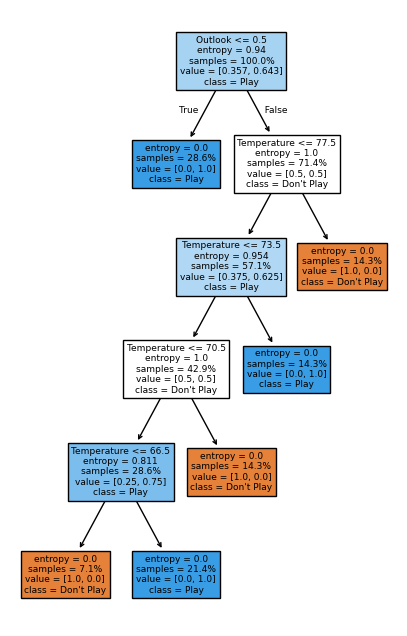

In [116]:
# View the result tree
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 8))
tree.plot_tree(
    clf, 
    feature_names=features,
    class_names=['Don\'t Play', 'Play'],
    proportion=True,
    filled=True
)

plt.show()

### Data Split and Performance Evaluation

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Repeat the preprocessing as above
golf_prepocessed = golf.copy()
label_encoder = LabelEncoder()
golf_prepocessed['Outlook'] = label_encoder.fit_transform(golf_prepocessed['Outlook'])


features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
X = golf_prepocessed[features].values
y = golf_prepocessed['Play'].values

X.shape, y.shape

((14, 4), (14,))

In [361]:
# Now We can split the test and training data using the test_size parameter
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)

In [362]:
X_train.shape, y_train.shape

((8, 4), (8,))

In [363]:
X_test.shape, y_test.shape

((6, 4), (6,))

In [376]:
# Continue our decision tree approach
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_impurity_decrease=0.1,
)
model.fit(X_train, y_train)

# Predict the values of the test set
y_pred = model.predict(X_test)

# Returns the mean accuracy of our predictor
clf.score(X_test, y_test)

0.6666666666666666

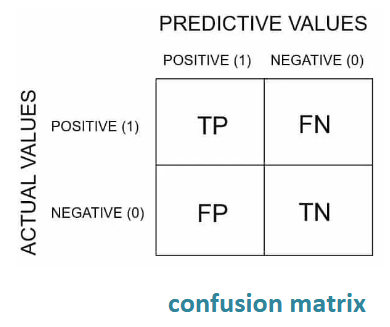

In [377]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[1 0]
 [2 3]]


In [378]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

          no       0.33      1.00      0.50         1
         yes       1.00      0.60      0.75         5

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6

